In [174]:
# SampleRight from ABB10

import random
import numpy as np

In [175]:
#GENERATE INPUTS:
def gaussian(s,c,x):
    """
    *Input: 
    s: Gaussian parameter
    c: Gaussian mean (a real number)
    x: Variable
    *Output: A real number
    exp((-pi*(x-c)^2)/s^2)   
    """
    return exp((-pi*(x-c)^2)/s^2)

#====================================================
#SampleZ Al. HERE
def sampleZalgorithm(n,s,c):
    """
    On input tuple (n,s,c), this Al. returns an integer number with Gaussian distribution
    *Input: 
    n: Security parameter
    s: Gaussian parameter
    c: Gaussian mean
    *Output:
    x: A random number with Gaussian distribution 
    """
    l =int(c -s*log(n,2))
    r = int(c+ s*log(n,2))
    i=0
    while i<1:
        x= random.randint(l,r)
        accept = random.uniform(0,1)
        if accept < gaussian(s,c,x): 
            i=i+1
            break
    return x
#====================================

def Random_Matrix(n,m):
    """
    *Input: 2 integer n,m 
    *Output: A random RANK n matrix B(nxm) with coefficients from 0 to q
    The output matrix has all row vectors independent
    """
    B=(matrix(ZZ,np.random.randint(q,size=(1,m)))) #first vector of B
    size_B=1
    while size_B < n:
        A = (matrix(ZZ,np.random.randint(q,size=(1,m))))
        h=B.rank()
        if ((B.stack(A))).rank()==h+1:
            B=B.stack(A) 
            size_B=size_B+1
    return(B)
#==========================================
#hermite normal form basis of a q-ary lattice.
def q_arybasis(A_1,q):
    """
    *Input: Arbitrary nxm matrix A_1 
    *Output: A HNF of perp. q-ary lattice corresponding to A_1
    All column vectors generate the whole lattice.
    """
    k=A_1.nrows()
    h =A_1.ncols()
    H=matrix(ZZ,((A_1).right_kernel()).basis())
    for i in range(k):
        H= matrix(ZZ,np.concatenate((H,matrix(q*matrix(np.identity(h,dtype=int))[h-n+i])), axis= 0))
    H=H.T
    return H
#======================================================
def ToBasis(V,S):
    """
    *Input:
    V: Independent short lattice vectors
    S: A basis of lattice L
    *Output: 
    A new short basis S_1 of lattice L
    """
    Q=matrix(ZZ,(S**(-1))*V)
    T = Q.echelon_form()
    U= Q*(T**(-1))
    S_1=matrix(ZZ,S*U)
    return(S_1)
#====================================================


#NEEDED ALG. IN SAMPLELEFT

def SampleD(B,s,c):
    """
    * Input:
    B: A basis of any lattice lambda (as a Matrix whose column vectors form the whole lattice)
    s: Gaussian parameter
    c: Gaussian mean vector 
    * Output:
    A vector in lattice lambda with gaussian distribution
    """
    m= B.rank()
    n= next_prime(2^10)
    B=B.T
    v=zero_vector(ZZ,m)
    G=(B.gram_schmidt())[0]
    Bc = list(zero_vector(ZZ,m))+[c]
    Bv = list(zero_vector(ZZ,m))+[v]
    for i in range(m,0,-1):
        ci = Bc[i].dot_product(G[i-1])/(G[i-1].dot_product(G[i-1]))
        si= s/(G[i-1].norm())
        zi= sampleZalgorithm(2031,si,ci)
        Bc[i-1]=Bc[i]-zi*B[i-1]
        Bv[i-1] = Bv[i] +zi*B[i-1]    
    return(Bv[0])

#===================================================================================
def SampleRight(A,B,R, T_B,u,s):  #This Alg. is in ABB10, section 4.1
    """*Input: 
    A : a random matrix in Z_q^{n*k}
    B: a RANK n matrix in Z_q^{n*m}
    R: a matrix in Z^{kxm} with coefficients are 1 or -1
    T_B: "short"  basis of q-ary lattice corresponding to B
    u : a random vector in Z_q^n
    s: a Gaussian parameter
    
    *Outpt:
    Let F_2 = (A|A*R + B). This alg. output a vector e in Z_q^{k+m} sampled from a distribution 
    statistically close to lattice Gaussian distribution of (F_2,u) with parameter s.
    """
    k = A.ncols()
    m = B.ncols()
    F_2 =matrix(GF(q),A.augment(A*R+B))
    #construct T_F2
    T_F2= matrix(-R*((T_B.T)[0])).augment(matrix((T_B.T)[0]))
    for i in range(m-1):
        T_F2= T_F2.stack(matrix(-R*((T_B.T)[i+1])).augment(matrix((T_B.T)[i+1])))
    I_k = identity_matrix(ZZ,k)
    for j in range(k):  
        w_j=I_k[j]
        u_j= matrix(GF(q),B).solve_right(vector(GF(q),-A*w_j))
        t_j= (matrix(ZZ,w_j-R*u_j)).augment(matrix(ZZ,u_j))
        T_F2=T_F2.stack(t_j)
    T_F2 = T_F2.T  
    B_F2=q_arybasis(F_2,q)
    F_1 = ToBasis(T_F2,B_F2)
    t= vector(ZZ,F_2.solve_right(vector(GF(q),u)))
    e = SampleD(F_1,sigma,-t)+t

    return e
#================================================================================

# A TEST CASE
q= 79 #next_prime(2^10)
r=2
n=3
m=5
k= 3
A = matrix(ZZ,random_matrix(GF(q), n,k))
B = Random_Matrix(n,m)
T_B=q_arybasis(B,q)
R = matrix(ZZ,random_matrix(GF(2),k,m))
R= list(R)
for i in range(k):
    for j in range(m):
        if R[i][j] ==0:
            R[i][j]= -1
R = matrix(R)
u = vector(ZZ,random_vector(GF(q), n))


In [170]:
#Normalise parameter s
def gram_schmidt_norm(S): #input matrix S whose columns are independent vectors
    m=S.rank()
    S_gram=((S.T).gram_schmidt()[0])
    S_gram_norm = int(max(((S_gram.rows())[i]).norm() for i in range(m)))+1
    return S_gram_norm
T_B_gram_norm = gram_schmidt_norm(T_B)
s = T_B_gram_norm * 12*sqrt(m)*log(m,2)

In [173]:
F_2=matrix(GF(q),A.augment(A*R+B))
t= SampleRight(A,B,R, T_B,u,s)
t

(97457, 42712, 11347, -41618, 103704, -114332, -67731, -19233)

In [172]:
#Check if F_2*t == u
F_2*t == u

True

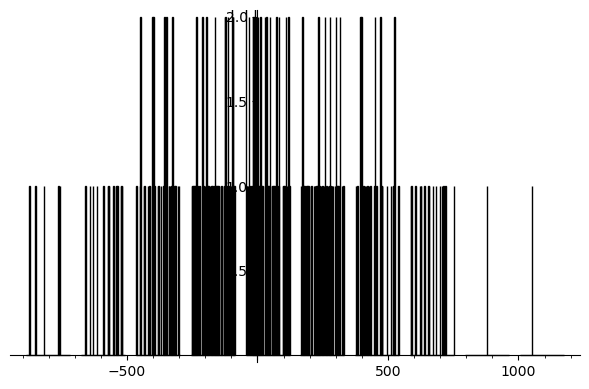

In [92]:
histogram([SampleRight(A,B,R, T_B,u,s) for i in range(100)])